# Lead Scoring Case Study 

## Team - Rohit Keshari & Rahul Choudhary

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# to perform the data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

%matplotlib inline

# to supress Warnings
import warnings
warnings.filterwarnings('ignore')

# to get the train and test data set
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# to import the statmodels
import statsmodels.api as sm

#Import the lib for Logistics Regression

from sklearn.linear_model import LogisticRegression

# to accuracny mesurement 

from sklearn import metrics

# to check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to plot the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

# to see the colassigication report

from sklearn.metrics import classification_report

# to calculate the cross validation score

from sklearn.model_selection import cross_val_score



In [2]:
# pip install mlxtend

<a id="0"></a>
#  The steps are below for this case study:

1. [Step 1: Reading and Understanding the Data](#1)
    - Loading the data - Leads-data
	- Make copy of leads data for further process if require 
    - Basic data inspection
    
1. [Step 2: Data Cleaning and Preparation ](#2)
    - Data information
    - Cheking NULL value precentage
	- Drop High percentage value columns
    - Duplicate check
    - Unique value checon each columns
	- Drop all the columns which dont  make any inference
	- NULL value treatment for each clumns
	- Impute with mode/median as per the require
	- Clbbing some parameters which are not not making sense individually 
    
1. [Step 3:EDA(Exploratory Data Analytics)](#3)
    - Univariate analysis for each columns
	- Inference from each columns
	- Note down all the columns which are not making any inference
	- We also treating outliers here
	- Capping the value where outliers are present
	- At lest dropping all the columns which are not making any use for deciding the leads

1. [Step 4: Data Preparation](#4)
    - Converting some binary variables (Yes/No) to 0/1t
    - For categorical variables with multiple levels, creating dummy Creation
	- Dropping the repeated variables
    
1.  [Step 5: Model Building](#5)
    - Train and Test Split
    - Features Scaling of the data
	- Checking the Lead Conversion Rate
	- Model Building - 1 :- Running Your First Training Model
	- Feature Selection Using RFE
	- Model Building - 2 with RFE
	- Model Building - 3 with RFE
	- Model Building - 4 with RFE
	- Cheking the p-value for each model and once it will be less than 0.05 will stop model building
	- Create confusion matrix
	- Calculate accuracy
	- Checking VIFs and removing all high VIFs 
	- We will stop RFE once VIF's less than 3
	- Heatmap of the all feature variable to check the Correlation
    
1. [Step 6: Model Evaluation](#6)
    - Calculating Metrics beyond Accuracy
	- Sensitivity & Specificity
	- Plotting the ROC Curve
	- Finding Optimal Cutoff Point
	- Precision and Recall
	- Precision and recall tradeoff
	- Calculating the F1 score<br>
 
1. [Step 7: Making predictions on the test set](#7)
   - Classification Report
   - Plotting the ROC Curve for Test data
   - Calculating the Area Under the Curve(GINI)

1. [Step 8: Calculating Lead score for the entire dataset](#8)<br>
   - Lead Score = 100 * ConversionProbability
   - This needs to be calculated for all the leads from the original dataset (train + test)
   
1. [Step 9: Determining Feature Importance](#9)<br>
   - Making the list of all features
   - Sorting these feature
   - Find out TOP 3 features variable 

1. [Step 10 :Conclusion](#10)<br>
   - Positive Coff. features
   - Negaive Coff. features
   - TOP 3 features
   - Closing statment

<a id="1"></a>
# Step 1: Reading and Understanding the Data

In [3]:
# Importing datasets
lead = pd.read_csv("leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of dataset
lead.shape

(9240, 37)

In [5]:
# information od dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# Check the datatype of each columns
lead.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
# check some statistical information
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# check the dupilcate entry
lead.loc[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


[Return to Steps:](#0)

<a id="2"></a>
# 2.Data Cleaning and Preparation 

In [9]:
# customer did not 'seleted' any option then data entry left as SELECT so covert them as NAN value
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

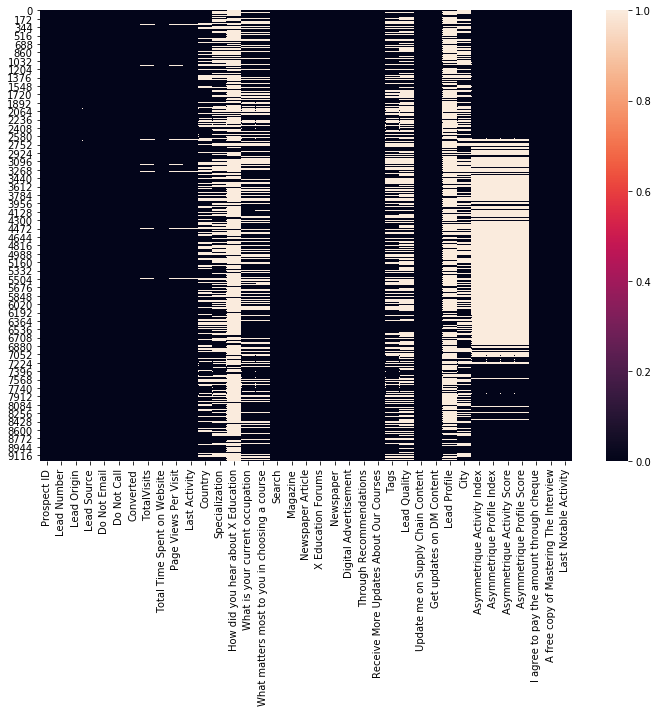

In [10]:
# as can see there are no null value present in data set
plt.figure(figsize=(10,10))
sns.heatmap(lead.isnull())
plt.tight_layout()

In [11]:
# Null value percentage count 
lead_missing = lead.count()/len(lead)
lead_missing = round((1-lead_missing)*100,2)
lead_missing.sort_values(ascending = False).head(40)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

##### Dropping all the columns which are more than  equal to 52 percent

- How did you hear about X Education - 78.463203 %
- Lead Profile - 74.188312 %


In [12]:
# Checking the shape of data before droping any columns
lead.shape

(9240, 37)

In [13]:
lead = lead.loc[:, lead_missing<52]

In [14]:
# Checking the shape of data before droping any columns
lead.shape

(9240, 35)

In [15]:
# lets check the unique var in each columns
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [16]:
# lets print the columns which only one variable and show no variance These features show no variance and thus all the leads have chosen one option, thus this
# feature doesnt make any impact or difference on conversion of leads.

print(lead.columns[lead.nunique()==1])

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')


Lets drop these columns which have only one unique value are:
- Magazine
- Recieve More updates about the course
- Update me on Supply chain content
- Get updates on DM content
- I agree to pay the amount through cheque 


In [17]:
# shape before droping the columns
lead.shape

(9240, 35)

In [18]:
# dropping the columns which has one unique value
lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],1)

In [19]:
# shape after droping the columns
lead.shape

(9240, 30)

In [20]:
# lets check the null percentage now
round(lead.isna().sum()/len(lead.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

- Lets check these clumns which has null value and will immpute the mean/median/mode value accordigly.

#  1- Lead Quality Column

In [21]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

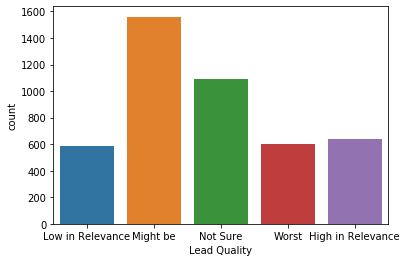

In [22]:
# see the count plot of this variable
sns.countplot(lead['Lead Quality'])

In [23]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

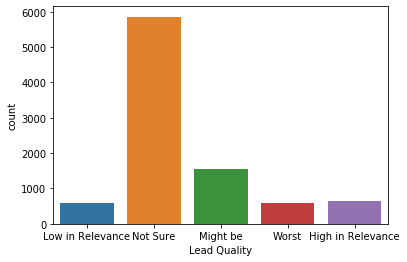

In [24]:
# lets check the count plot now
sns.countplot(lead['Lead Quality'])

#  2 - Asymmetrique Activity/Profile Columns

#### An index and score assigned to each customer based on their activity and their profile

- Asymmetrique Activity Index
- Asymmetrique Profile Index   
- Asymmetrique Activity Score    
- Asymmetrique Profile Score

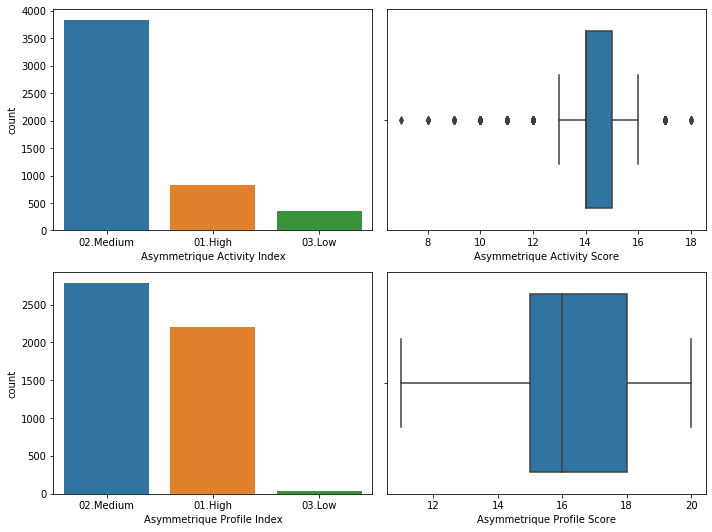

In [25]:
# lets see count and boxplot of all these columns together

fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(lead['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout() #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.

- We can see that too much variation so its not reliable to impute any value in it. Also 45% null values means we need to drop these columns.

In [26]:
# lets drop all thest columns
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)


# 3.City Column

In [27]:
# city statistcis

lead["City"].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

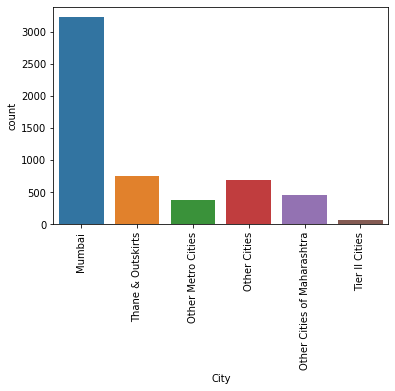

In [28]:
# see the count plot of this variable 
sns.countplot(lead.City)
xticks(rotation = 90)

- So here we can see the TOP data is "Mumbai", lets fill the null values with Mode value


In [29]:
# Mode
lead["City"].mode()

0    Mumbai
dtype: object

In [30]:
# fill the NAN value with Mode
lead["City"] = lead["City"].replace(np.nan, 'Mumbai')

# 4.Specialization Column

In [31]:
# lets see the head part of the data and dtype
lead.Specialization.head()

0                        NaN
1                        NaN
2    Business Administration
3      Media and Advertising
4                        NaN
Name: Specialization, dtype: object

In [32]:
# Specailization stats data

lead["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

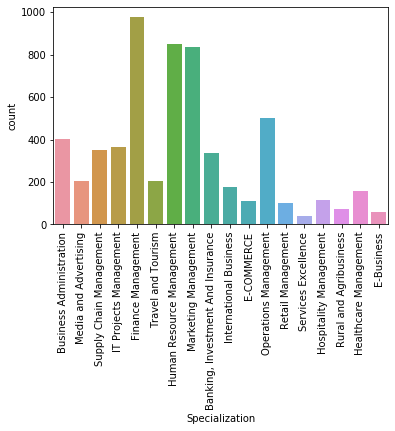

In [33]:
# see the count plot of this variable
sns.countplot(x= 'Specialization', data = lead)
plt.xticks(rotation=90)

- It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list, may not have any specialization or is a student. Hence we can make a category "Others" for missing values. 

In [34]:
# lets fill the NAN with Other Specialization

lead["Specialization"] = lead["Specialization"].replace(np.nan,'Other Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

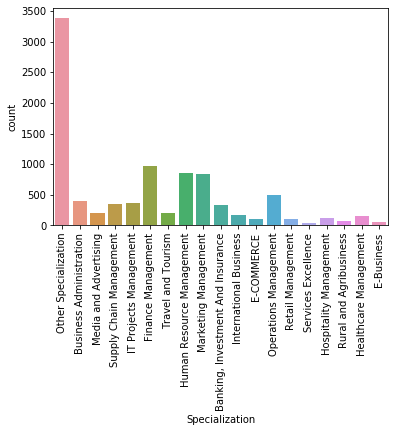

In [35]:
# see the count plot of this variable

sns.countplot(x= 'Specialization', data = lead)
plt.xticks(rotation=90)

# 5.Tags Column

In [36]:
# Tags statistcis

lead["Tags"].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

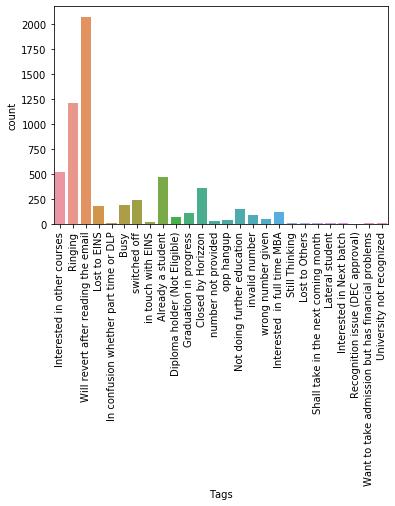

In [37]:
# see the count plot of this variable
sns.countplot(x= 'Tags', data = lead)
plt.xticks(rotation=90)

In [38]:
# NAN in the tag column may be imputed by 'Will revert after reading the email' this is most option has filled

lead['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [39]:
# imputed the value for tags columns
lead["Tags"] = lead["Tags"].replace(np.nan,'Will revert after reading the email')

# 6.What matters most to you in choosing a course


In [40]:
#What matters most to you in choosing a course statistcis

lead["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

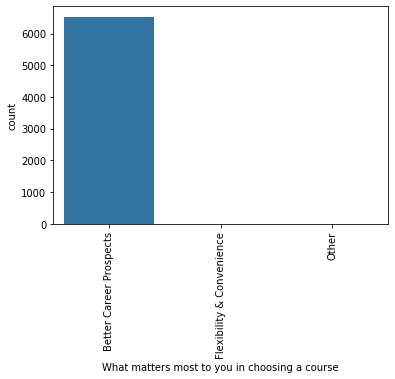

In [41]:
# see the count plot of this variable
sns.countplot(x= 'What matters most to you in choosing a course', data = lead)
plt.xticks(rotation=90)

In [42]:
#mode
lead['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [43]:
# imputed the value for this columns
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# 7.What is your current occupation

In [44]:
# What is your current occupation
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

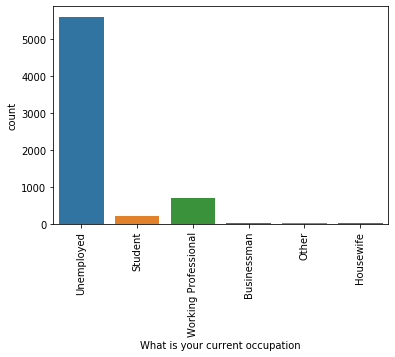

In [45]:
# see the count plot of this variable
sns.countplot(x= 'What is your current occupation', data = lead)
plt.xticks(rotation=90)

In [46]:
# imputed the value for this columns
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

# 8.Country

In [47]:
# Country stattistics

lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

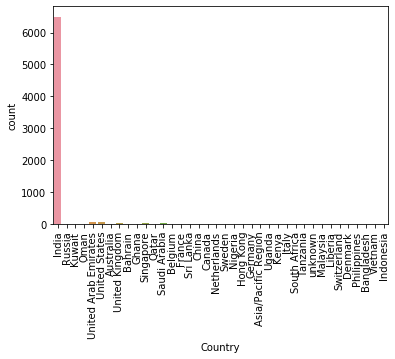

In [48]:
# see the count plot of this variable
sns.countplot(x= 'Country', data = lead)
plt.xticks(rotation=90)

In [49]:
# imputed the value for this columns

lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [50]:
# lets check the null value percentage now
round(lead.isna().sum()/len(lead.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [51]:
# Rest missing values are under 2% so we can drop these rows.
lead.dropna(inplace = True)

In [52]:
# lets verify NAN percentage
round(lead.isna().sum()/len(lead.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

- We can see the null value percentage is zero

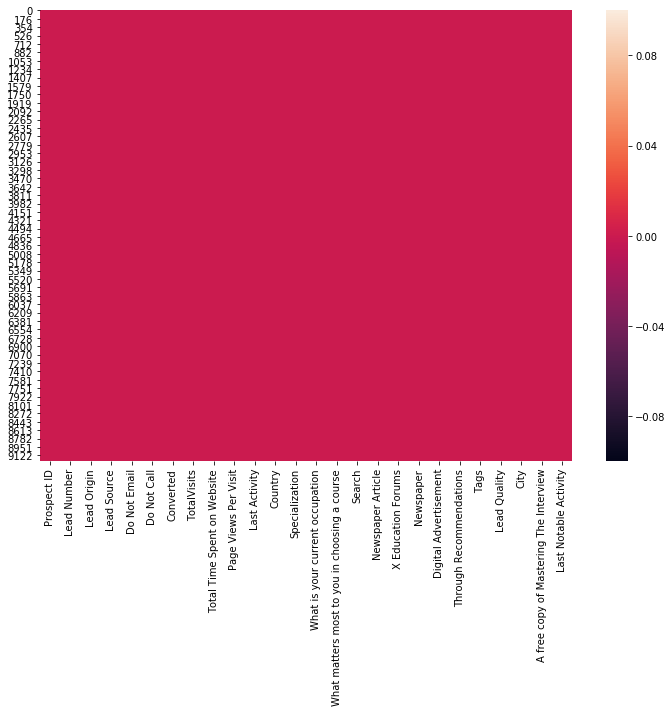

In [53]:
# as can see there are no null value present in data set
plt.figure(figsize=(10,10))
sns.heatmap(lead.isnull())
plt.tight_layout()


In [54]:
# lets check the shape now
lead.shape

(9074, 26)

In [55]:
# lets save this data to clean_data
lead.to_csv('clean_Leads_data')

[Return to Steps:](#0)

<a id="3"></a>
# Step 3:EDA(Exploratory Data Analytics)

## Univariate Analysis

In [56]:
#Lead Number columns head data

lead["Lead Number"].head()

0    660737
1    660728
2    660727
3    660719
4    660681
Name: Lead Number, dtype: int64

In [57]:
# statistical view of this columns
lead["Lead Number"].describe()

count      9074.000000
mean     617032.619352
std       23348.029512
min      579533.000000
25%      596406.000000
50%      615278.500000
75%      637176.500000
max      660737.000000
Name: Lead Number, dtype: float64

In [58]:
lead["Prospect ID"].head()

0    7927b2df-8bba-4d29-b9a2-b6e0beafe620
1    2a272436-5132-4136-86fa-dcc88c88f482
2    8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3    0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4    3256f628-e534-4826-9d63-4a8b88782852
Name: Prospect ID, dtype: object

In [59]:
# statistical view of this columns
lead["Prospect ID"].describe()

count                                     9074
unique                                    9074
top       2be87f90-5931-49dc-bb87-54d8452cb693
freq                                         1
Name: Prospect ID, dtype: object

- Lead Number- A lead number assigned to each lead procured and will delete the columns 'Prospect ID' as it will not have any effect in the predicting model.


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

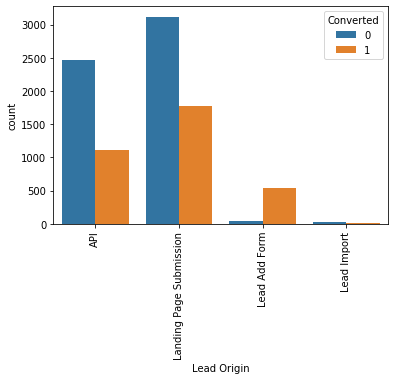

In [60]:
# Lead Origin count plot
sns.countplot(x= 'Lead Origin', hue = 'Converted', data = lead)
plt.xticks(rotation=90)


##### Inference-

- API and Landing Page Submission have more number of coversion.
- Lead Add Form has more number of conversion.
- Lead Import has least number of conversion.
- To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

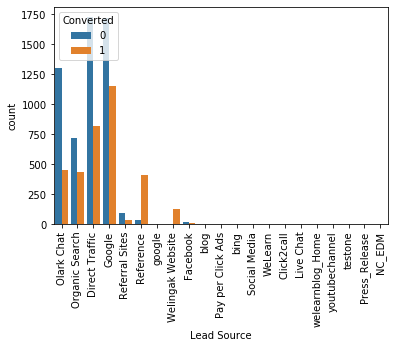

In [61]:
#Lead Source count plot of this variable

sns.countplot(x= 'Lead Source', hue = 'Converted', data = lead)
plt.xticks(rotation=90)

In [62]:
# as can see the one columns name is not duplicate and combining all other lead source to name ""Othres""
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['blog', 'Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home', 'youtubechannel','testone','Press_Release', 'NC_EDM'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

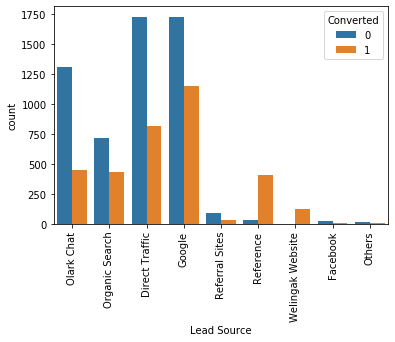

In [63]:
# let see the countplot again with updated columns
sns.countplot(x= 'Lead Source', hue = 'Converted', data = lead)
plt.xticks(rotation=90)

#### Inference- 

- Direct traffic & Google have maximum number of leads
- Conversion Rate of Reference leads and leads through welingak website is high.
- To improve lead conversion rate we need focus on olark chat, organic search, direct - traffic, and google leads and generate more leads from reference and welingak website.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct - traffic so taht lead coversation rate will increase.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

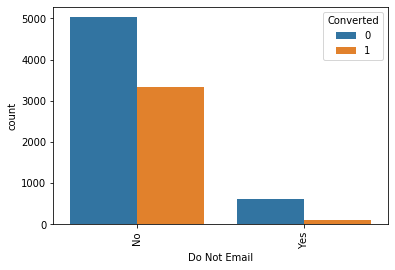

In [64]:
# 'Do Not Email' -count plot of this 
sns.countplot(x= 'Do Not Email', hue = 'Converted', data = lead)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

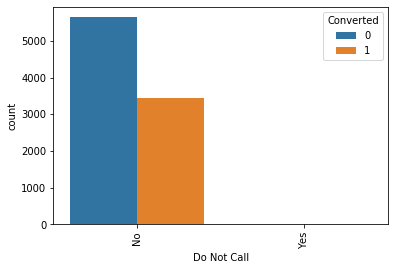

In [65]:
# 'Do Not Call' -count plot of this

sns.countplot(x= 'Do Not Call', hue = 'Converted', data = lead)
plt.xticks(rotation=90)

#### Inference- 

- As can see the both variable giving the good set of information to help in coversation in lead


In [66]:
#'TotalVisits' - data head part

lead["TotalVisits"].head()

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
Name: TotalVisits, dtype: float64

In [67]:
# statistical information of this column
lead["TotalVisits"].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [68]:
# lets see the data in differenet percentile range
lead["TotalVisits"].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

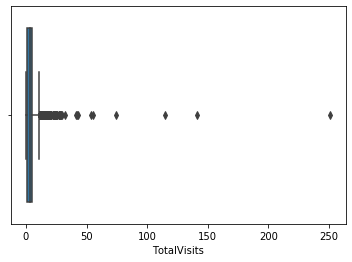

In [69]:
# box plot to see the outliers 
sns.boxplot(lead['TotalVisits'])

In [70]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

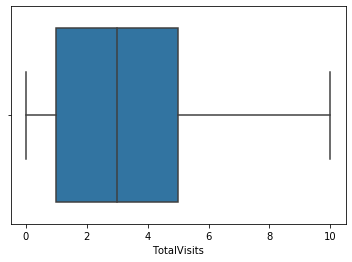

In [71]:
# let see the outliers now , no outliers and all are capped
sns.boxplot(lead['TotalVisits'])

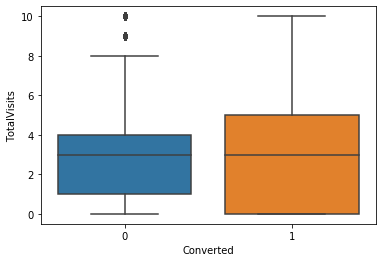

In [72]:
# lets see the Conversation of lead on TotalVisits 
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

#### Inference- 
- Both Median are same for converted and not converted leads.
- Nothng conclusive can be said on the basis of Total Visits.

In [73]:
#Total Time Spent on Website
lead["Total Time Spent on Website"].head()

0       0
1     674
2    1532
3     305
4    1428
Name: Total Time Spent on Website, dtype: int64

In [74]:
# statistical data view
lead["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

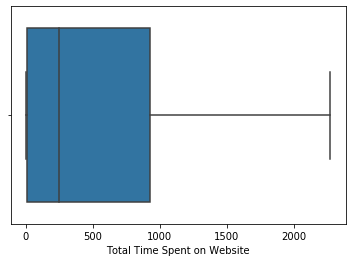

In [75]:
# boxplot to visualize the statistical data 
sns.boxplot(lead['Total Time Spent on Website'])

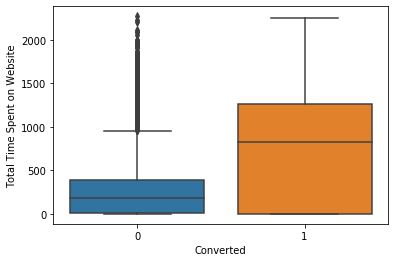

In [76]:
# lets see the Conversation of lead on Total Time Spent on Website 
sns.boxplot(y = lead['Total Time Spent on Website'], x = "Converted", data = lead)

#### Inference-

- As can see the higher number of coverstion whp spending more time on the website
- To increase this, we need to make more attracting and engaging website

In [77]:
#Page Views Per Visit
lead["Page Views Per Visit"].head()

0    0.0
1    2.5
2    2.0
3    1.0
4    1.0
Name: Page Views Per Visit, dtype: float64

In [78]:
# statistical data view
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [79]:
# lets see the data in differenet percentile range
lead['Page Views Per Visit'].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

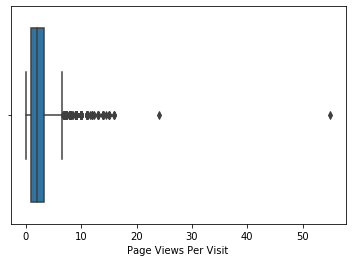

In [80]:
# box plot to see the outliers
sns.boxplot(lead["Page Views Per Visit"])

In [81]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

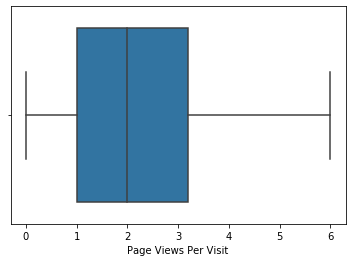

In [82]:
# let see the outliers now , no outliers and all are capped
sns.boxplot(lead["Page Views Per Visit"])

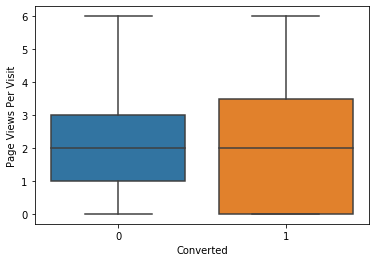

In [83]:
# lets see the Conversation of lead on Page Views Per Visit
sns.boxplot(y= lead["Page Views Per Visit"], x = lead["Converted"], data=lead)

#### Inference-

- BOth Median for converted and unconverted are same
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [84]:
#Last Activity
lead["Last Activity"].head()

0    Page Visited on Website
1               Email Opened
2               Email Opened
3                Unreachable
4          Converted to Lead
Name: Last Activity, dtype: object

In [85]:
# statistical data view

lead["Last Activity"].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

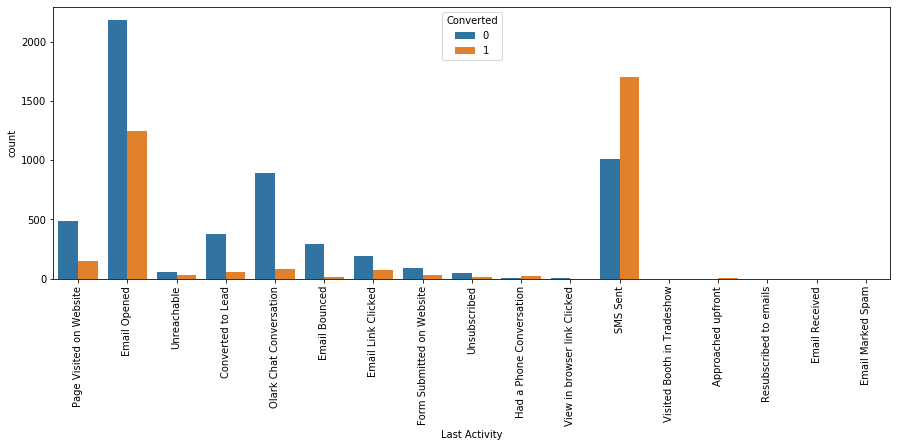

In [86]:
# see the count plot of this variable
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(lead["Last Activity"], hue=lead["Converted"])
xticks(rotation = 90)

In [87]:
# Let's keep all valued last activities as such and combine all others to "Othe Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

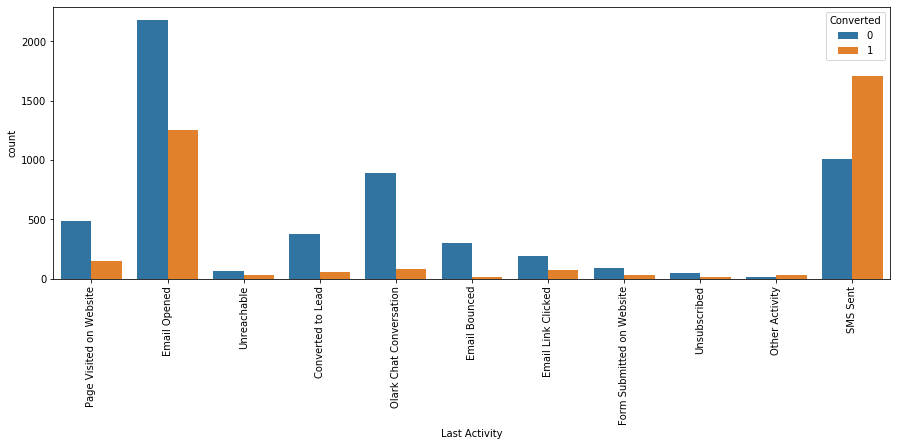

In [88]:
# see the count plot of this variable
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(lead["Last Activity"], hue=lead["Converted"])
xticks(rotation = 90)

#### Inference- 

- Highest lead conversation rate on SMS Sent adn later Email Opened
- Most of the lead have their Email opened as their last activity.
- We need to focus on SMS Sent and Email opened fators


In [89]:
#Country
lead["Country"].head()

0    India
1    India
2    India
3    India
4    India
Name: Country, dtype: object

In [90]:
# statistical data view
lead["Country"].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

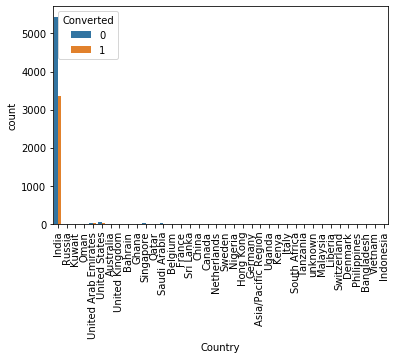

In [91]:
# lets see the Conversation of lead on Country wise
sns.countplot('Country', hue= 'Converted', data = lead)
xticks(rotation = 90)

#### Inference- 

- Maximum lead are found from INDIA so no inference can be drawn

In [92]:
# Specialization
lead["Specialization"].head()


0       Other Specialization
1       Other Specialization
2    Business Administration
3      Media and Advertising
4       Other Specialization
Name: Specialization, dtype: object

In [93]:
# statistical data view
lead["Specialization"].describe()

count                     9074
unique                      19
top       Other Specialization
freq                      3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

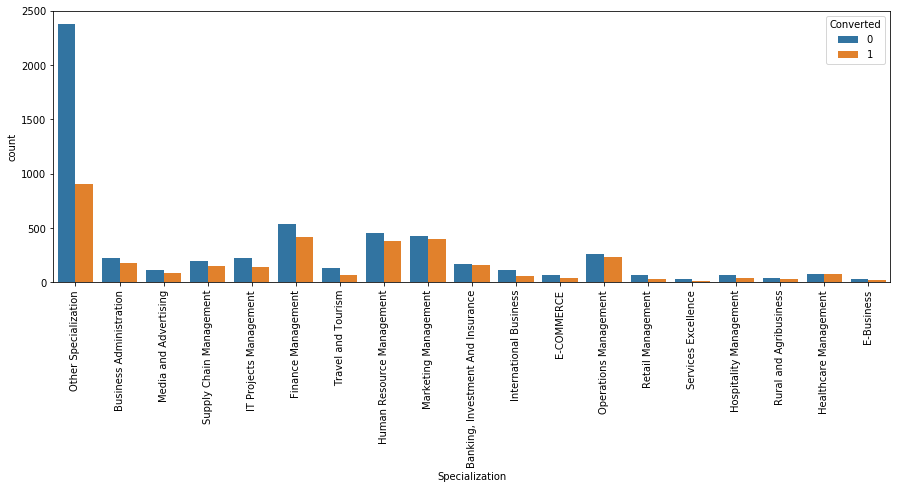

In [94]:
# see the count plot of this variable
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = lead["Specialization"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference- 
- We need focus more on the Specialization with high conversion rate.

In [95]:
#What is your current occupation
lead["What is your current occupation"].head()

0    Unemployed
1    Unemployed
2       Student
3    Unemployed
4    Unemployed
Name: What is your current occupation, dtype: object

In [96]:
# statistical data view
lead["What is your current occupation"].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

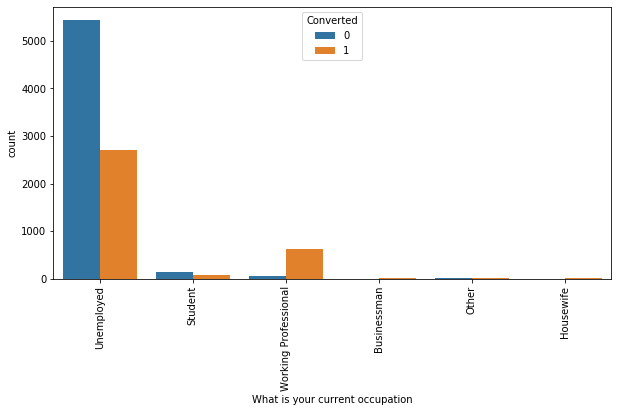

In [97]:
# see the count plot of this variable
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = lead["What is your current occupation"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference-

- Working Professionals has highest conversation rate as compare to others
- Unemployed leads has hoghest number and conversation rate also high
- if we can target them number will increase


In [98]:
# What matters most to you in choosing a course

lead["What matters most to you in choosing a course"].head()

0    Better Career Prospects
1    Better Career Prospects
2    Better Career Prospects
3    Better Career Prospects
4    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object

In [99]:
# statistical data view
lead["What matters most to you in choosing a course"].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

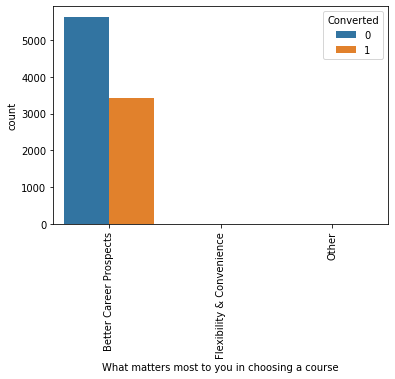

In [100]:
# see the count plot of this variable
sns.countplot(x = lead["What matters most to you in choosing a course"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference- 
- Highest entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

In [101]:
# Search
lead["Search"].head()

0    No
1    No
2    No
3    No
4    No
Name: Search, dtype: object

In [102]:
# statistical data view
lead["Search"].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

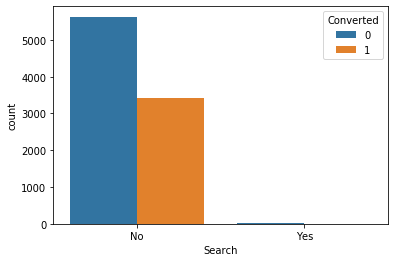

In [103]:
# lets see the Conversation of lead on Search 
sns.countplot(lead["Search"], hue = lead["Converted"])

#### Inference-

- Most entries are 'No'. No Inference can be drawn from this

In [104]:
# Newspaper Article

lead["Newspaper Article"].head()

0    No
1    No
2    No
3    No
4    No
Name: Newspaper Article, dtype: object

In [105]:
# statistical data view
lead["Newspaper Article"].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

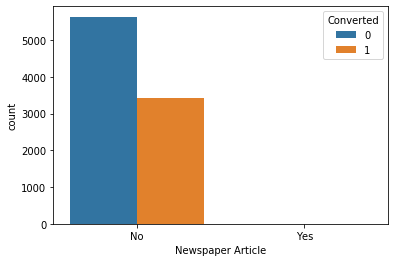

In [106]:
# see the count plot of this variable
sns.countplot(lead["Newspaper Article"], hue = lead["Converted"])

#### Inference- 
- Most entries are 'No'.
- No Inference can be drawn with column

In [107]:
# X Education Forums
lead["X Education Forums"].head()

0    No
1    No
2    No
3    No
4    No
Name: X Education Forums, dtype: object

In [108]:
# statistical data view
lead["X Education Forums"].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

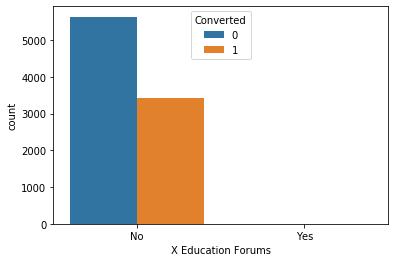

In [109]:
# lets see the Conversation of lead on X Education Forums
sns.countplot(lead["X Education Forums"], hue = lead["Converted"])

#### Inference-
- Most entries are 'No'.
- No Inference can be drawn with this column

In [110]:
# Newspaper

lead["Newspaper"].head()

0    No
1    No
2    No
3    No
4    No
Name: Newspaper, dtype: object

In [111]:
# statistical data view
lead["Newspaper"].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

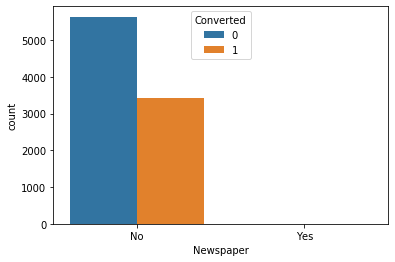

In [112]:
# lets see the Conversation of lead on Newspaper
sns.countplot(lead["Newspaper"], hue = lead["Converted"])

#### Inference-

- Most entries are 'No'.
- No Inference can be drawn with this parameter.

In [113]:
# Digital Advertisement

lead["Digital Advertisement"].head()

0    No
1    No
2    No
3    No
4    No
Name: Digital Advertisement, dtype: object

In [114]:
# statistical data view
lead["Digital Advertisement"].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

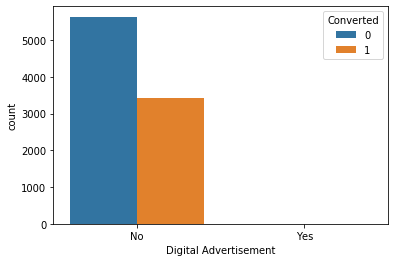

In [115]:
# lets see the Conversation of lead on "Digital Advertisement
sns.countplot(lead["Digital Advertisement"], hue = lead["Converted"])

#### Inference-
- Most entries are 'No'.
- No Inference can be drawn with this parameter.

In [116]:
# Through Recommendations

lead["Through Recommendations"].head()

0    No
1    No
2    No
3    No
4    No
Name: Through Recommendations, dtype: object

In [117]:
# statistical data view
lead["Through Recommendations"].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

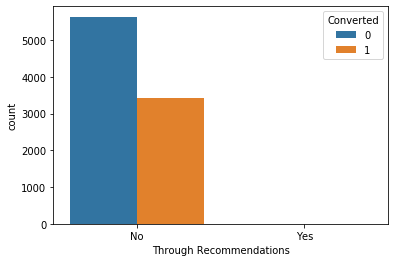

In [118]:
# see the count plot of this variable

sns.countplot(lead["Through Recommendations"], hue = lead["Converted"])

#### Inference-
- Most entries are 'No'.
- No Inference can be drawn with this.

In [119]:
# Tags

lead["Tags"].head()

0            Interested in other courses
1                                Ringing
2    Will revert after reading the email
3                                Ringing
4    Will revert after reading the email
Name: Tags, dtype: object

In [120]:
# statistical data view
lead['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

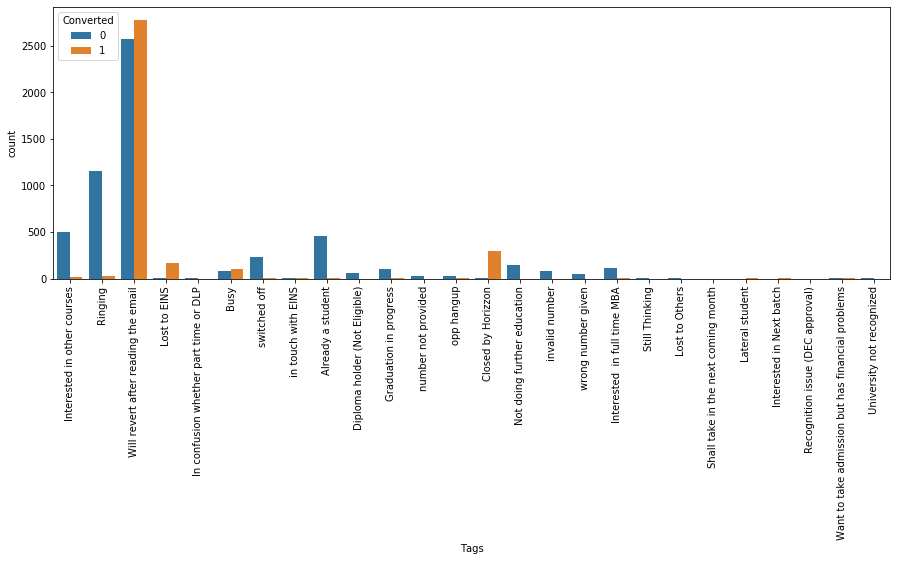

In [121]:
# lets see the Conversation of lead on Tags
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = lead["Tags"], hue = lead["Converted"])
xticks(rotation = 90)

In [122]:
# Let's keep main last activities as such and club all others to "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

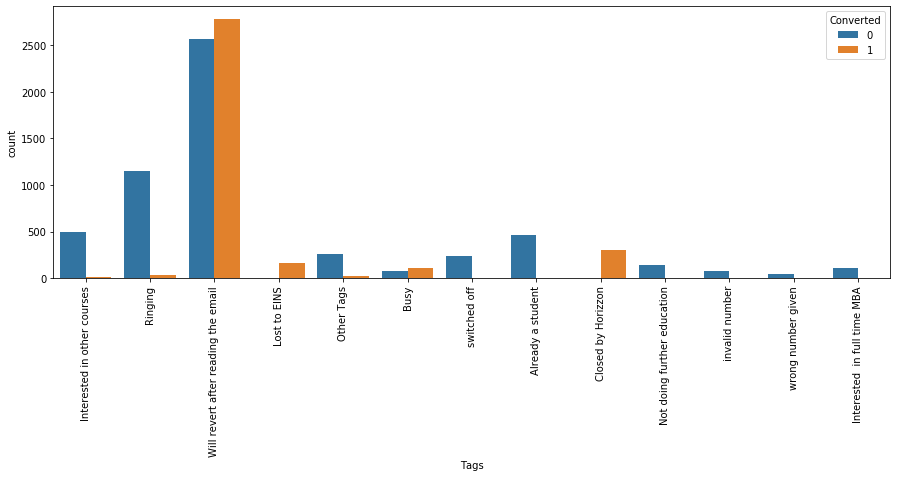

In [123]:
# lets see the Conversation of lead on Tags now after chnages 
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = lead["Tags"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference-

- 'Will revert after reading email', Lostto EINS and Closed by Horizon has maximum rate of lead conversation
- 'Ringing', 'Intrested in other courses', 'Switched off', and others are having very bad lead conversation 


In [124]:
# City
lead["City"].head()

0    Mumbai
1    Mumbai
2    Mumbai
3    Mumbai
4    Mumbai
Name: City, dtype: object

In [125]:
# statistical data view
lead["City"].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

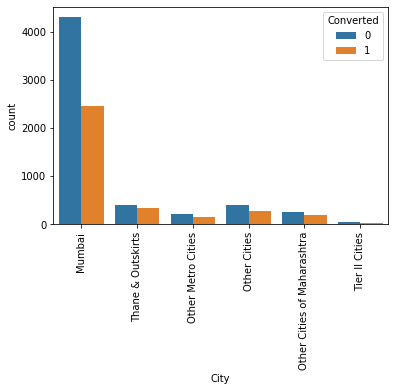

In [126]:
# lets see the Conversation of lead on City
sns.countplot(x = lead["City"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference-

- Most leads are from mumbai
- Thane also has good number overall


In [127]:
# A free copy of Mastering The Interview', 'Last Notable Activity

lead["A free copy of Mastering The Interview"].head()

0     No
1     No
2    Yes
3     No
4     No
Name: A free copy of Mastering The Interview, dtype: object

In [128]:
# statistical data view
lead["A free copy of Mastering The Interview"].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

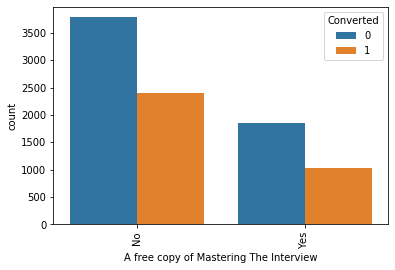

In [129]:
# lets see the Conversation of lead on A free copy of Mastering The Interview
sns.countplot(x = lead["A free copy of Mastering The Interview"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference-

- Most entries are 'No'. Seem these columns is Skewed.
- No Inference can be drawn with this parameter.


In [130]:
# Last Notable Activity

lead["Last Notable Activity"].head()

0        Modified
1    Email Opened
2    Email Opened
3        Modified
4        Modified
Name: Last Notable Activity, dtype: object

In [131]:
# statistical data view
lead["Last Notable Activity"].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

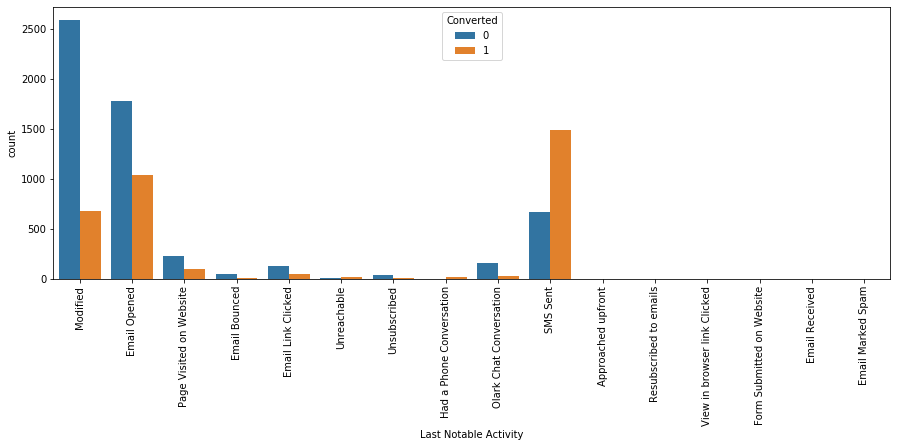

In [132]:
# lets see the Conversation of lead on Last Notable Activity
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = lead["Last Notable Activity"], hue = lead["Converted"])
xticks(rotation = 90)

In [133]:
# Let's keep main important last activities as such and club all others to "Other Notable Activity"
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Resubscribed to emails',
'View in browser link Clicked',
'Form Submitted on Website',
'Email Received',
'Email Marked Spam',
'Email Marked Spam'], 'Other Notable Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

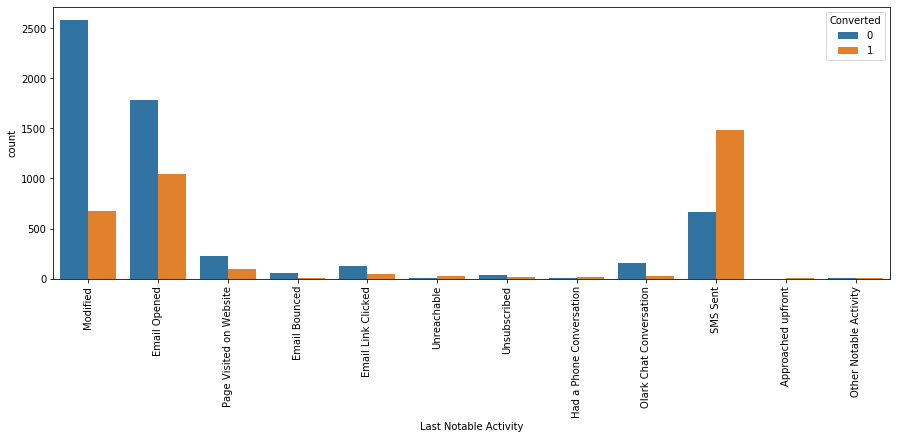

In [134]:
# lets see the Conversation of lead on Last Notable Activity after changes
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = lead["Last Notable Activity"], hue = lead["Converted"])
xticks(rotation = 90)

#### Inference-

- SMS Sent has most coversation rate of leads
- Modified and Email Opened are least

# Conclusion 

Below are columns are not making any Inference so dropping all below columns

- 'Prospect ID'
- 'Country'
- 'What matters most to you in choosing a course',
- 'Search',
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations',
- 'A free copy of Mastering The Interview',



In [135]:
# check the shpae of before
lead.shape

(9074, 26)

In [136]:
# dropping all the columns which are not mentioned above
lead = lead.drop(['Prospect ID',
'Country',
'What matters most to you in choosing a course',
'Search',
'Newspaper Article',
'X Education Forums',
'Newspaper', 
'Digital Advertisement',
'Through Recommendations',
'A free copy of Mastering The Interview',
],axis = 1)

In [137]:
# lets check the shape now
lead.shape

(9074, 16)

In [138]:
# Lets see the columns list after EDA
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

[Return to Steps:](#0)

<a id="4"></a>
# 4.Data Preparation

In [139]:
# date head part after cleaning process
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Converting some binary variables (Yes/No) to 0/1

In [140]:
# Converting Yes to 1 and No to 0
lead['Do Not Email'] = lead['Do Not Email'].map({'Yes': 1, 'No': 0})
lead['Do Not Call'] = lead['Do Not Call'].map({'Yes': 1, 'No': 0})


## For categorical variables with multiple levels, creating dummy Creation

In [141]:
### Dummy Variable Creation

dummy_var = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [142]:
# lets concat the data with mail leads data
lead = pd.concat([lead, dummy_var], axis=1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


## Dropping the repeated variables

In [143]:
### Dropping the repeated variables which we are used for dummy variable creation
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [144]:
# lets check the gead data and verify the same
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


[Return to Steps:](#0)

<a id="5"></a>
# 5.Model Building


## Train and Test Split

In [145]:
# Creating a copy of this origial variable so that if needed later we can use that
org_leads = lead.copy()
print(org_leads.shape)
print(lead.shape)

(9074, 83)
(9074, 83)


In [146]:
# Let's start by splitting our data into a training set and a test set.
### Splitting Data into Training and Test Sets

# Putting feature variable to X
X = lead.drop(['Lead Number','Converted'],axis=1)

# Putting response variable to y
y = lead['Converted']


In [147]:
# head part of X
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [148]:
# y part of head
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [149]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##  Features Scaling of the data

In [150]:
# lets see the data before scaling 
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,2.0,397,2.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,5.0,1584,2.5,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [151]:
# Define the instance for StandardScaler() 
scaler = StandardScaler()

# lets scale the data
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# lets see the data after scaling 
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Checking the Lead Conversion Rate

In [152]:
# Checking the current lead coversion rate
Converted_rate = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)
Converted_rate

37.86

## Model Building - 1 :- Running Your First Training Model

In [153]:
# logistic regression model(LRM)

LRM_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
LRM_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.2
Date:                Mon, 20 Apr 2020   Deviance:                       2500.5
Time:                        20:32:11   Pearson chi2:                 3.89e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.0259   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3786      0.326     -4.225      0.000      -2.018      -0.739
Do Not Call                                             23.7113   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1815      0.087      2.092      0.036       0.011       0.352
Total Time Spent on Website                              1.1461      0.064     17.919      0.000       1.021       1.271
Page Views Per Visit                                    -0.3274      0.099     -3.310      0.001      -0.521      -0.134
Lead Origin_Landing Page Submission                     -0.9777      0.221     -4.427      0.000      -1.411      -0.545
Lead Origin_Lead Add Form                               -0.4179      1.287     -0.325      0.745      -2.941       2.105
Lead Origin_Lead Import                                 29.7284   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6277   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2029      0.155      1.310      0.190      -0.101       0.507
Lead Source_Olark Chat                                   0.8649      0.234      3.700      0.000       0.407       1.323
Lead Source_Organic Search                               0.2290      0.210      1.088      0.276      -0.183       0.641
Lead Source_Others                                       0.7604      0.816      0.932      0.351      -0.839       2.360
Lead Source_Reference                                    1.7891      1.344      1.331      0.183      -0.845       4.423
Lead Source_Referral Sites                              -0.0921      0.491     -0.188      0.851      -1.054       0.870
Lead Source_Welingak Website                             5.4740      1.486      3.684      0.000       2.562       8.386
Last Activity_Email Bounced                             -0.5583      0.870     -0.642      0.521      -2.264       1.147
Last Activity_Email Link Clicked                         0.8423      0.644      1.308      0.191      -0.420       2.104
Last Activity_Email Opened                              -0.0008      0.385     -0.002      0.998      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1106      0.591      0.187      0.852      -1.049       1.270
Last Activity_Olark Chat Conversation                   -0.5468      0.392     -1.395      0.163      -1.315       0.221
Last Activity_Other Activity                             1

- So you finally built your first multivariate logistic regression model using all the features present in the dataset. This is the summary output for different variables that you got:

- In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

- We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE

- You built your first model in the previous segment. Based on the summary statistics, you inferred that many of the variables might be insignificant and hence, you need to do some feature elimination. Since the number of features is huge, let's first start off with an automated feature selection technique (RFE) and then move to manual feature elimination (using p-values and VIFs) - this is exactly the same process that you did in linear regression.
 
- So let's start off with the automatic feature selection technique - RFE.

In [154]:
# lets create the instance

LR = LogisticRegression()

In [155]:
# lets import the RFE 
from sklearn.feature_selection import RFE

# lets do the RFE with 15 Vsriables 
rfe = RFE(LR,15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train,y_train)

In [156]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 66),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 58),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent',

In [158]:
# lets store the rfe.support_ columns
col = X_train.columns[rfe.support_]

In [159]:
# lets view the columns which we have selected for modelling
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [160]:
# Let see the all false vaue columns
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       '

## Model Building - 2

In [161]:
##### Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
LRM_2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = LRM_2.fit()
# summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Mon, 20 Apr 2020   Deviance:                       3161.3
Time:                        20:32:26   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

- We can see the p-value is high : .999, lets drop this columns and see 

In [162]:
# dropping the columns
col = col.drop('Tags_wrong number given',1)

In [163]:
# Col view
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model Building - 3

In [164]:
X_train_sm = sm.add_constant(X_train[col])
LRM_3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = LRM_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.1
Date:                Mon, 20 Apr 2020   Deviance:                       3166.1
Time:                        20:32:27   Pearson chi2:                 3.11e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9321      0.214     -9.014      0.000      -2.352      -1.512
Do Not Email                                            -1.3098      0.213     -6.159      0.000      -1.727      -0.893
Lead Origin_Lead Add Form                                1.0588      0.361      2.930      0.003       0.351       1.767
Lead Source_Welingak Website                             3.4494      0.818      4.218      0.000       1.847       5.052
What is your current occupation_Working Professional     1.3025      0.288      4.517      0.000       0.737       1.868
Tags_Busy                                                3.6319      0.331     10.977      0.000       2.983       4.280
Tags_Closed by Horizzon                                  7.8114      0.762     10.251      0.000       6.318       9.305
Tags_Lost to EINS                                        9.0287      0.753     11.989      0.000       7.553      10.505
Tags_Ringing                                            -1.8820      0.338     -5.565      0.000      -2.545      -1.219
Tags_Will revert after reading the email                 3.8115      0.228     16.737      0.000       3.365       4.258
Tags_invalid number                                    -22.3753   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.4815      0.588     -4.221      0.000      -3.634      -1.329
Lead Quality_Not Sure                                   -3.3487      0.129    -26.040      0.000      -3.601      -3.097
Lead Quality_Worst                                      -3.7506      0.850     -4.412      0.000      -5.417      -2.085
Last Notable Activity_SMS Sent                           2.7801      0.122     22.856      0.000       2.542       3.019
========================================================================================================================
"""

- We can see the p-value is high : .999, lets drop this columns and see 

In [165]:
# dropping the column
col = col.drop('Tags_invalid number',1)

## Model Building - 4

In [166]:
X_train_sm = sm.add_constant(X_train[col])
LRM_4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = LRM_4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 20 Apr 2020   Deviance:                       3177.6
Time:                        20:32:27   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

- Now, we can see the all p-value is approx zero and lets proceed with predited value

In [167]:
#the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
dtype: float64

In [168]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.88037158e-01, 1.94070077e-01, 8.04879357e-04, 7.82076694e-01,
       9.77003470e-01, 9.90227993e-01, 1.88037158e-01, 7.53103755e-01,
       8.67356930e-01, 8.04879357e-04])

In [169]:
#Creating a dataframe with the actual Converted and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID
0,0,0.188037,3009
1,0,0.194070,1012
2,0,0.000805,9226
3,1,0.782077,4750
4,1,0.977003,7987


In [170]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


In [171]:
# Let's check the overall accuracy of this model on train set

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


### Coming Up In the next segment, you will learn how to calculate the accuracy of the fitted logistic regression curve

##### Confusion Matrix and Accuracy

You chose a cutoff of 0.5 in order to classify the customers into 'Churn' and 'Non-Churn'. Now, since you're classifying the customers into two classes, you'll obviously have some errors. The classes of errors that would be there are:

* '1' (Converted) leads being (incorrectly) classified as '0'(Not -Converted)
* '0'(Not -Converted) leads being (incorrectly) classified as '1' (Converted)
 

##### To capture these errors, and to evaluate how well the model is, you'll use something known as the 'Confusion Matrix'. 

##### So using the confusion matrix, you got an accuracy of about 90% which seems to be a good number to begin with. The steps you need to calculate accuracy are:

- Create the confusion matrix
- Calculate the accuracy by applying the 'accuracy_score' function to the above matrix


##  Create confusion matrix

In [172]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [173]:
# Predicted     not_converted  Converted
# Actual
# not_converted        3756      149
# Converted            363       2083

## Calculate accuracy

In [174]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


# Checking VIFs

- Coming Up So far you have only selected features based on RFE. Further elimination of features using the p-values and VIFs manually is yet to be done. You'll do that in the next section.

## Manual Feature Elimination

- Recall that you had used RFE to select 15 features. But as you saw in the pairwise correlations, there are high values of correlations present between the 15 features, i.e. there is still some multicollinearity among the features. So you definitely need to check the VIFs as well to further eliminate the redundant variables. Recall that VIF  calculates how well one independent variable is explained by all the other independent variables combined. And its formula is given as:
 
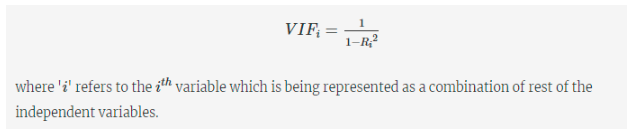
 

Let's see about eliminating the insignificant variables based on the VIFs, and the p-values.

In [175]:
# defined the vif check funtion  to check the VIF for the model
def vif_check(Y):
    vif = pd.DataFrame()
    vif['Features'] = X_train[Y].columns
    vif['VIF'] = [variance_inflation_factor(X_train[Y].values, i) for i in range(X_train[Y].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [176]:
# Cheking the Variance Inflation Factor(VIF)
vif_check(col)

,Features,VIF
8,Tags_Will revert after reading the email,2.81
10,Lead Quality_Not Sure,2.76
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.54
12,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
4,Tags_Busy,1.11
0,Do Not Email,1.10


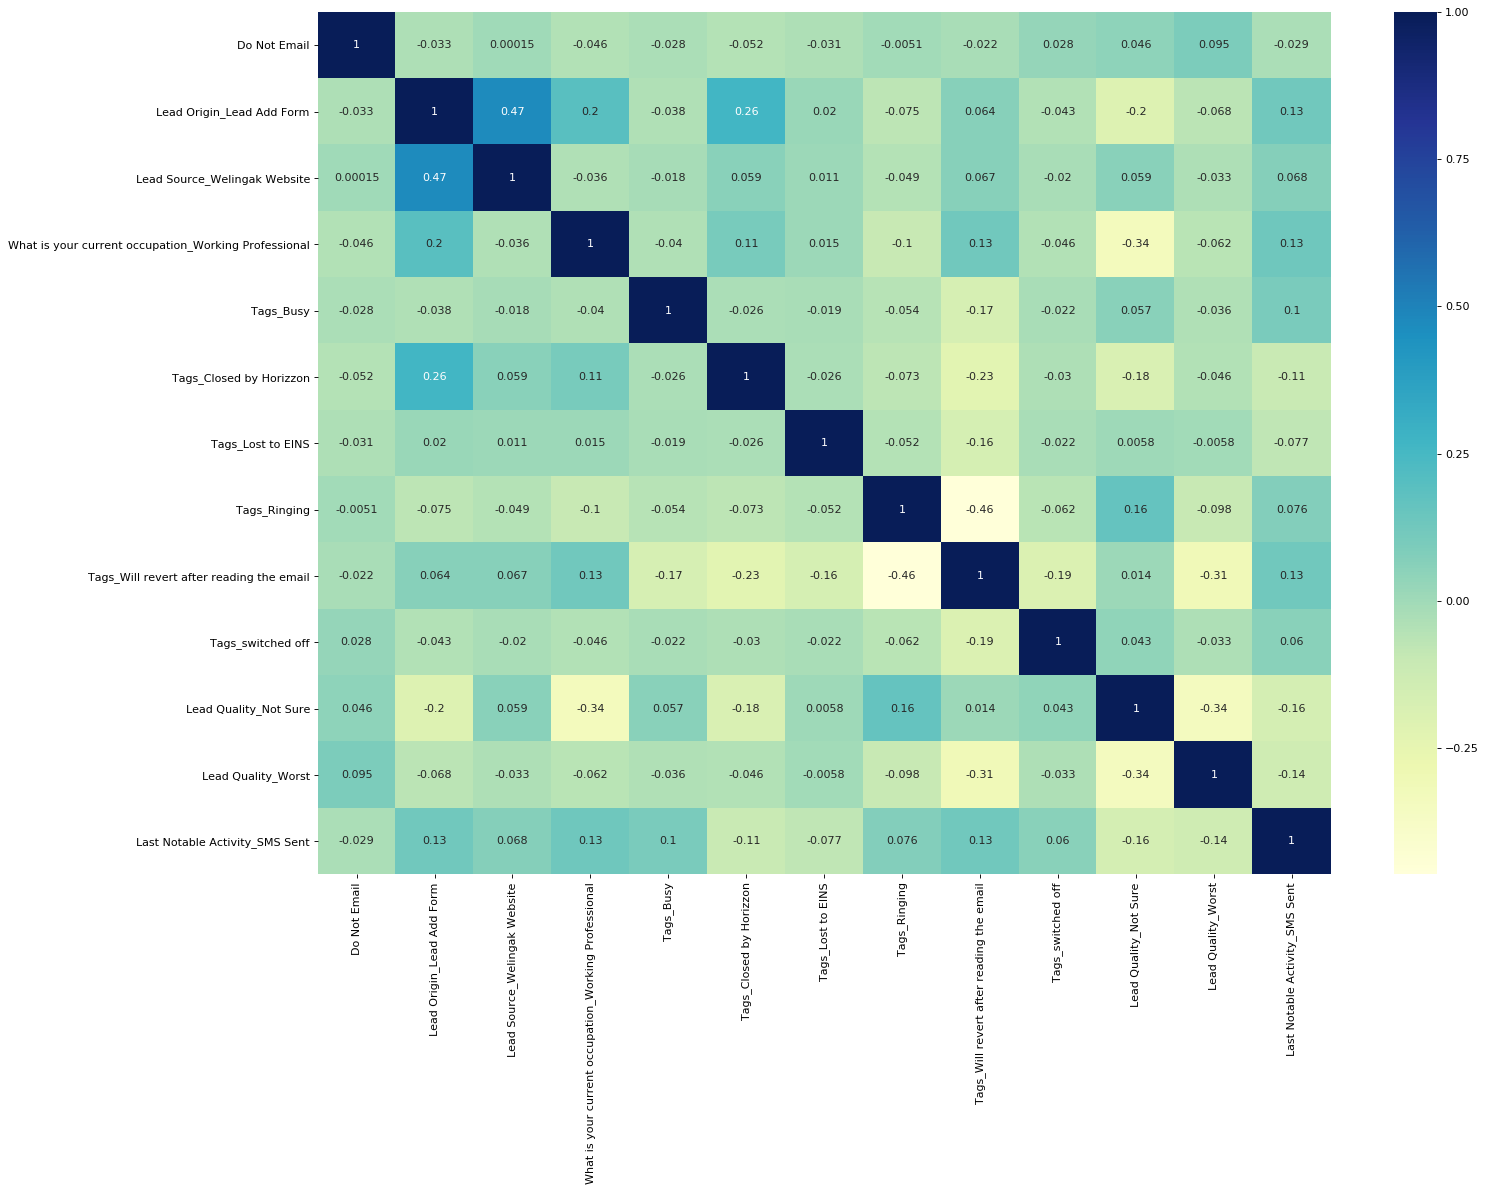

In [177]:
# lets see the heat map 
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[col].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu")

plt.tight_layout()


#### Our latest model have the following features:
- All variables have p-value less than 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy greater than 90% at a probability threshold of 0.05 is also very acceptable.

#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

[Return to Steps:](#0)

<a id="6"></a>
# 6.Model Evaluation

## Calculating Metrics beyond Accuracy

In [178]:
# Confusion matrix 
#confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [179]:
# Predicted     not_converted  Converted
# Actual
# not_converted        3756      149
# Converted            363      2083  


In [180]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9193827743662415

In [181]:
# Metrics beyond simply accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8515944399018807

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9618437900128041

In [184]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038156209987195905


In [185]:
# positive predictive value 
print (TP / float(TP+FP))

0.9332437275985663


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9118718135469774


#  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [188]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

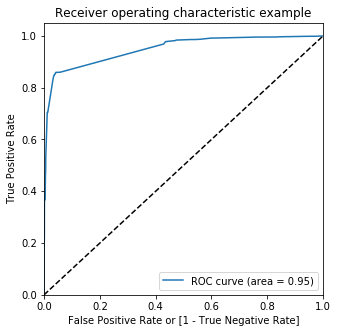

In [189]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


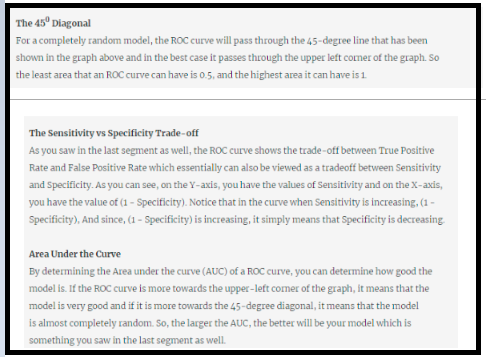

## Calculating the Area Under the Curve(GINI)

# Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [190]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [191]:
auc = auc_val(fpr,tpr)
auc

0.9494148642692398

#### As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Since we got a value is greater than 90, our model seems to be doing well on the test dataset.

In [192]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [193]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705873  0.981603  0.533163
0.2   0.2  0.910408  0.859771  0.942125
0.3   0.3  0.918910  0.859362  0.956210
0.4   0.4  0.920013  0.858136  0.958771
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919225  0.845053  0.965685
0.8   0.8  0.878287  0.705233  0.986684
0.9   0.9  0.813258  0.524530  0.994110


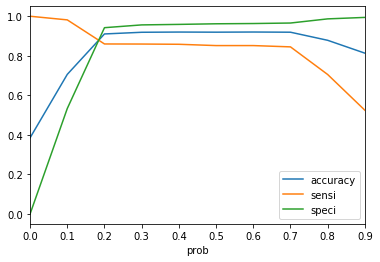

In [194]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.2 is the optimum point to take it as a cutoff probability where all three line are intersectiing 

In [195]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1
5,1,0.990228,1281,1,1,1,1,1,1,1,1,1,1,1
6,0,0.188037,2880,0,1,1,0,0,0,0,0,0,0,0
7,1,0.753104,4971,1,1,1,1,1,1,1,1,1,0,0
8,1,0.867357,7536,1,1,1,1,1,1,1,1,1,1,0
9,0,0.000805,1248,0,1,0,0,0,0,0,0,0,0,0


In [196]:
# Let's check the overall accuracy.
acc_train_score = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acc_train_score)

0.9104078097937333


In [197]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3679,  226],
       [ 343, 2103]], dtype=int64)

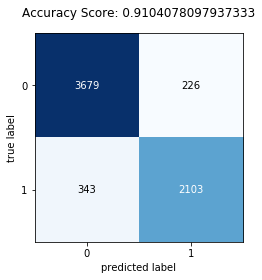

In [198]:
# plot the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=confusion2)
all_sample_title = 'Accuracy Score: {0}'.format(acc_train_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8597710547833197

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.9421254801536492

In [202]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05787451984635083


In [203]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9029626449119794


In [204]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9147190452511188


## Precision and Recall


In [205]:
confusion  = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3679,  226],
       [ 343, 2103]], dtype=int64)

In [206]:
##### Precision
# TP / TP + FP
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print(precision )
                                                     

0.9029626449119794


In [207]:
##### Recall
# TP / TP + FN

recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print(recall)

0.8597710547833197


In [208]:
# Using sklearn utilities for the same

from sklearn.metrics import precision_score, recall_score


In [209]:
precision_score(y_train_pred_final.Converted ,  y_train_pred_final.predicted )

0.9029626449119794

In [210]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8597710547833197

## Precision and recall tradeoff

In [211]:
# Precision and recall 

from sklearn.metrics import precision_recall_curve

In [212]:
# y_train_pred_final.Converted, y_train_pred_final.predicted

In [213]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

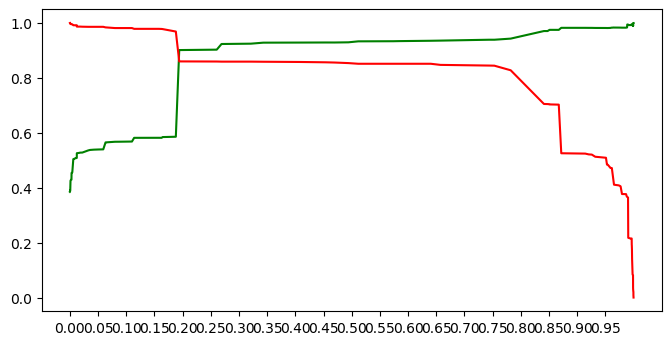

In [214]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

- From the precision-recall graph above, we get the optical threshold value as close to .2. However our business requirement here is to have Lead Conversion Rate around 80%.
- This is already achieved with our earlier threshold value of 0.2. So we will stick to this value.

##  Calculating the F1 score

- F1 = 2×(Precision*Recall)/(Precision+Recall)¶


In [215]:
F1 = 2*(precision*recall)/(precision+recall)
print(F1)

0.8808376963350786


[Return to Steps:](#0)

<a id="7"></a>
# 7.Making predictions on the test set

#### First Using the scaler function from the train dataset to transfor the test dataset

In [216]:
# data scaling- only Transform
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# head part of the data
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [217]:
# lets take all the required columns 
X_test = X_test[col]
# head of the data view
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [218]:
# adding the constant
X_test_sm = sm.add_constant(X_test)

In [219]:
# pnow, wll make the predication on data set
y_test_pred = res.predict(X_test_sm)

In [220]:
y_test_pred[:10]

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
1800    0.961508
6507    0.012329
4821    0.000445
4223    0.996691
4714    0.188037
dtype: float64

In [221]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [222]:
y_pred_1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [223]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [224]:
# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [225]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [226]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [227]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [228]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [229]:
y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [230]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)

In [231]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,3271,0,0.188037
1,1490,1,0.961508
2,7936,0,0.188037
3,4216,1,0.999049
4,3830,0,0.188037


In [232]:
# Using the probability threshold value 0f 0.2 on the test dataset to predict if a lead will convert

y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [233]:
# head of the data y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [234]:
# Let's check the overall accuracy.
accuracy_score= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print(accuracy_score)

0.906720528828498


In [235]:
# confusion matrix on test 
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1635,   99],
       [ 155,  834]], dtype=int64)

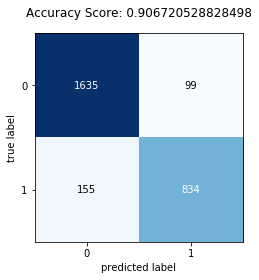

In [236]:
# plot the confusion matrix 
fig, ax = plot_confusion_matrix(conf_mat=confusion3)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 12);
plt.tight_layout()


In [237]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8432760364004045

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.9429065743944637

In [240]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05709342560553633


In [241]:
# Positive predictive value 
print (TP / float(TP+FP))


0.8938906752411575


In [242]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9134078212290503


In [243]:
# precision 
Precision_test = confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])
print(Precision_test)

0.8938906752411575


In [244]:
# recall 
Recall_test = confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])
print(Recall_test)

0.8432760364004045


In [245]:
# F1 score
F1 = 2*(Precision_test*Recall_test)/(Precision_test+Recall_test)
F1

0.8678459937565037

## Classification Report

In [246]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1734
           1       0.89      0.84      0.87       989

    accuracy                           0.91      2723
   macro avg       0.90      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



## Cross Validation Score
- To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [247]:
# lets calculate the CVS
Log_Reg = LogisticRegression(solver = 'lbfgs')
CVS = cross_val_score(Log_Reg, X, y, cv=10)
CVS.sort()
CVS_acc = CVS.mean()

print(CVS)
print(CVS_acc)

[0.87086093 0.88325991 0.88546256 0.88546256 0.89427313 0.89636163
 0.9030837  0.90738699 0.9106946  0.92723264]
0.8964078631837852


## Plotting the ROC Curve for Test data

In [248]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [249]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_prob, drop_intermediate = False )

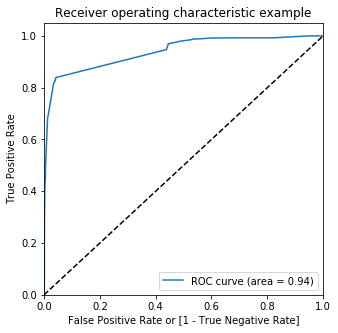

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.76701269e-04, 5.76701269e-04,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.73010381e-03, 1.73010381e-03, 2.30680507e-03,
        2.30680507e-03, 2.30680507e-03, 2.30680507e-03, 2.30680507e-03,
        2.30680507e-03, 2.30680507e-03, 4.03690888e-03, 4.61361015e-03,
        4.61361015e-03, 5.19031142e-03, 5.19031142e-03, 5.19031142e-03,
        5.19031142e-03, 5.19031142e-03, 1.26874279e-02, 1.38408304e-02,
        1.38408304e-02, 3.34486736e-02, 3.80622837e-02, 3.80622837e-02,
        3.92156863e-02, 3.97923875e-02, 4.03690888e-02, 4.15224913e-02,
        4.20991926e-02, 4.32525952e-02, 4.32525952e-02, 4.55594002e-02,
        5.70934256e-02, 4.38869666e-01, 4.45213379e-01, 4.480968

In [250]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_prob)

## Calculating the Area Under the Curve(GINI)

In [251]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [252]:
auc = auc_val(fpr,tpr)
auc

0.9393688124152296

#### As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Since we got a value of 0.9678, our model seems to be doing well on the test dataset.

[Return to Steps:](#0)

<a id="8"></a>
# 8.Calculating Lead score for the entire dataset

### Steps :

- Lead Score = 100 * ConversionProbability
- This needs to be calculated for all the leads from the original dataset (train + test)

In [253]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [254]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [255]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,predicted
0,3009,0,0.188037,0
1,1012,0,0.194070,0
2,9226,0,0.000805,0
3,4750,1,0.782077,1
4,7987,1,0.977003,1


In [256]:
leads_train_pred = leads_train_pred.rename(columns = {"predicted": "final_predicted"})

In [257]:
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.188037,0
1,1012,0,0.194070,0
2,9226,0,0.000805,0
3,4750,1,0.782077,1
4,7987,1,0.977003,1


In [258]:
# Concatenating the train and the test dataset with the Conversion Probabilities

In [259]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.188037,0
1,1012,0,0.194070,0
2,9226,0,0.000805,0
3,4750,1,0.782077,1
4,7987,1,0.977003,1


In [260]:

# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [261]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [262]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.188037,0,19
1,1012,0,0.194070,0,19
2,9226,0,0.000805,0,0
3,4750,1,0.782077,1,78
4,7987,1,0.977003,1,98


In [263]:
# Inspecing the max LeadID
lead_full_pred['Lead ID'].max()

9239

In [264]:

# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.110195,0,11
1,0,0.000805,0,0
2,1,0.867357,1,87
3,0,0.000805,0,0
4,1,0.867357,1,87


In [265]:
org_leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [266]:
# Slicing the Lead Number column from original_leads dataframe
org_leads = org_leads[['Lead Number']]
org_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [267]:
#Concatenating the 2 dataframes based on index.
# This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [268]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([org_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0,0.110195,0,11
1,660728,0,0.000805,0,0
2,660727,1,0.867357,1,87
3,660719,0,0.000805,0,0
4,660681,1,0.867357,1,87
5,660680,0,0.188037,0,19
6,660673,1,0.867357,1,87
7,660664,0,0.188037,0,19
8,660624,0,0.188037,0,19
9,660616,0,0.188037,0,19


In [269]:
# Inspecting the dataframe shape
leads_with_score.shape

(9074, 5)

In [270]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead_Score,0,0.0
final_predicted,0,0.0
Converted_prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


[Return to Steps:](#0)

<a id="9"></a>
# 9.Determining Feature Importance

In [271]:
# lets see all the columns which are part of this modelling and making  the prediction 
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [272]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.30
Lead Origin_Lead Add Form                               1.09
Lead Source_Welingak Website                            3.41
What is your current occupation_Working Professional    1.34
Tags_Busy                                               3.80
Tags_Closed by Horizzon                                 7.96
Tags_Lost to EINS                                       9.18
Tags_Ringing                                           -1.69
Tags_Will revert after reading the email                3.97
Tags_switched off                                      -2.29
Lead Quality_Not Sure                                  -3.34
Lead Quality_Worst                                     -3.76
Last Notable Activity_SMS Sent                          2.74
dtype: float64

In [273]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -14.18
Lead Origin_Lead Add Form                               11.87
Lead Source_Welingak Website                            37.19
What is your current occupation_Working Professional    14.60
Tags_Busy                                               41.44
Tags_Closed by Horizzon                                 86.68
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -18.46
Tags_Will revert after reading the email                43.22
Tags_switched off                                      -24.93
Lead Quality_Not Sure                                  -36.40
Lead Quality_Worst                                     -40.99
Last Notable Activity_SMS Sent                          29.86
dtype: float64

In [274]:
feature_importance.sort_values(ascending=False)

Tags_Lost to EINS                                      100.00
Tags_Closed by Horizzon                                 86.68
Tags_Will revert after reading the email                43.22
Tags_Busy                                               41.44
Lead Source_Welingak Website                            37.19
Last Notable Activity_SMS Sent                          29.86
What is your current occupation_Working Professional    14.60
Lead Origin_Lead Add Form                               11.87
Do Not Email                                           -14.18
Tags_Ringing                                           -18.46
Tags_switched off                                      -24.93
Lead Quality_Not Sure                                  -36.40
Lead Quality_Worst                                     -40.99
dtype: float64

[Return to Steps:](#0)

<a id="10"></a>
# 10.Conclusion
|
### After trying several models, we finally chose a model with the following characteristics:

- All variables have p-value is les than 0.05.
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the - features. This is also evident from the heat map
- The overall accuracyis more than 90% at a probability threshold of 0.2 on the test dataset is also very acceptable.

#### Below are Positive coff. features:

- Tags_Lost to EINS                                      100.00
- Tags_Closed by Horizzon                                 86.68
- Tags_Will revert after reading the email                43.22
- Tags_Busy                                               41.44
- Lead Source_Welingak Website                            37.19
- Last Notable Activity_SMS Sent                          29.86
- What is your current occupation_Working Professional    14.60
- Lead Origin_Lead Add Form                               11.87

#### Below are Negative coff. features:

- Do Not Email                                           -14.18
- Tags_Ringing                                           -18.46
- Tags_switched off                                      -24.93
- Lead Quality_Not Sure                                  -36.40
- Lead Quality_Worst                                     -40.99


#### Below are TOP 3 coff. features:
- Tags_Lost to EINS                                      100.00
- Tags_Closed by Horizzon                                 86.68
- Tags_Will revert after reading the email                43.22



# Closing statement 

- We have build the model for leads and we have got some fetures which we is important for leads coversion and within some is positive coff. and some negative.

- We have seleted the probability threshold value as per model result and we can select as per the business requirement and so it will decrease and increase the Sensitivity and specificity.

- High sensitivity will ensure that almost all leads with a probability of conversion are correctly predicted where high specificity will ensure that leads that are on the verge of converting or not are selected.


# Thank you

[Return to Steps:](#0)